In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
edd512 = pd.read_csv("../../results_rebuttal/mtd-512.csv", index_col=0)
edd1024 = pd.read_csv("../../results_rebuttal/mtd-1024.csv", index_col=0)
arl = pd.read_csv("../../results_rebuttal/arl-10000.csv", index_col=0)

In [3]:
edd512

,algorithm,dataset,actual_cps,detected_cps,detected_cps_at,runtime,config,rep,alpha,mtd,alg+dataset
0,MMD,NormalToLaplace1024,[512],[],[ 564 1024],1.916419,$\alpha = 0.021544346900318832$,0,0.021544,52,MMD Laplace
0,MMD,NormalToLaplace1024,[512],[],[ 556 1024],1.639091,$\alpha = 0.021544346900318832$,1,0.021544,44,MMD Laplace
0,MMD,NormalToLaplace1024,[512],[],[ 576 1024],1.640300,$\alpha = 0.021544346900318832$,2,0.021544,64,MMD Laplace
0,MMD,NormalToLaplace1024,[512],[],[ 568 1024],1.662840,$\alpha = 0.021544346900318832$,3,0.021544,56,MMD Laplace
0,MMD,NormalToLaplace1024,[512],[],[ 560 1024],1.676127,$\alpha = 0.021544346900318832$,4,0.021544,48,MMD Laplace
...,...,...,...,...,...,...,...,...,...,...,...
0,MMDEW,NormalToUnif1024,[512],[],[ 624 1024],1.689616,$\alpha = 0.01$,15,0.010000,112,MMDEW Unif
0,MMDEW,NormalToUnif1024,[512],[],[ 576 1024],1.646733,$\alpha = 0.01$,16,0.010000,64,MMDEW Unif
0,MMDEW,NormalToUnif1024,[512],[],[ 640 1024],1.858134,$\alpha = 0.01$,17,0.010000,128,MMDEW Unif
0,MMDEW,NormalToUnif1024,[512],[],[ 572 1024],1.665983,$\alpha = 0.01$,18,0.010000,60,MMDEW Unif


In [8]:
rep = {
    "Uniform10000" : "Uniform",
    "Mixed10000" : "Mixed",
    "Laplace10000" : "Laplace",
    "NormalToMixed1536" : "Mixed",
    "NormalToLaplace1536" : "Laplace",
    "NormalToUnif1536" : "Unif"
}

In [10]:
edd512 = edd512.sort_values("alg+dataset", ascending=False)
edd1024 = edd1024.sort_values("alg+dataset", ascending=False)
arl = arl.sort_values("alg+dataset", ascending=False)

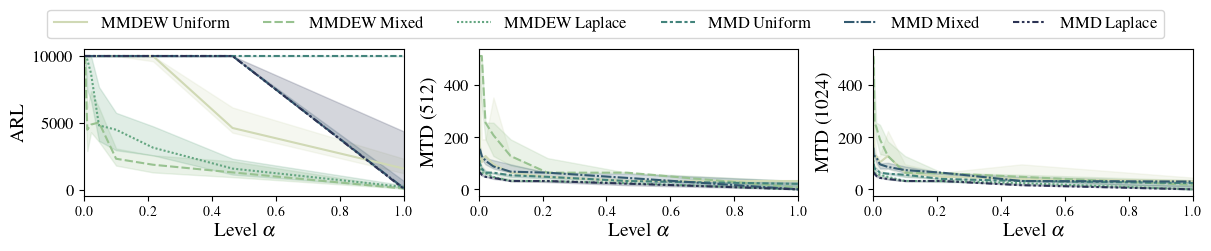

In [20]:
with sns.cubehelix_palette(7, start=0.5, rot=-0.75, gamma=1.2):
    fig, (ax11, ax12, ax13) = plt.subplots(1,3,sharey=False,sharex=True,figsize=(12,2),layout="constrained")
    sns.lineplot(data=arl, x="alpha", y="arl", hue="alg+dataset", ax=ax11, estimator="median", style="alg+dataset")
    sns.lineplot(data=edd512, x="alpha", y="mtd", hue="alg+dataset", ax=ax12, estimator="median", style="alg+dataset")
    sns.lineplot(data=edd1024, x="alpha", y="mtd", hue="alg+dataset", ax=ax13, estimator="median", style="alg+dataset")

    ax12.set_xlim((0,1))
    ax11.set_ylabel("ARL")
    ax12.set_ylabel("MTD (512)")
    ax13.set_ylabel("MTD (1024)")
    ax11.set_xlabel("Level $\\alpha$")
    ax12.set_xlabel("Level $\\alpha$")
    ax13.set_xlabel("Level $\\alpha$")

    fig.align_ylabels()

    Line, Label = ax11.get_legend_handles_labels()
    ax11.get_legend().remove()
    ax12.get_legend().remove()
    ax13.get_legend().remove()

    fig.legend(Line, Label, loc="upper center", bbox_to_anchor=(0.5, 1.22), ncol=6)
    plt.savefig("../../mmdew-article/fig/edd+arl_0pad.pdf", bbox_inches="tight", pad_inches=0)